# **Student Dropout Prediction Using Predictive Analytics**

---

oleh : Anju Anjannah

## **Deskripsi Proyek**
Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat memprediksi status dropout mahasiswa dengan lebih akurat dan efisien. Tingginya angka dropout mahasiswa merupakan permasalahan signifikan di institusi pendidikan. Proses identifikasi mahasiswa yang berisiko dropout secara manual seringkali sulit, memakan waktu, dan tidak akurat, yang dapat menyebabkan terlambatnya intervensi dan dukungan yang dibutuhkan mahasiswa. Hal ini dapat berdampak negatif pada mahasiswa itu sendiri maupun performa institusi. Model prediksi dropout mahasiswa dapat membantu mengatasi permasalahan ini dengan memberikan solusi yang lebih akurat, efisien, dan berbasis data, memungkinkan institusi untuk mengidentifikasi dan memberikan dukungan tepat waktu kepada mahasiswa yang membutuhkan.

# **1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

# **2. Data Understanding**

**2.1 Data loading**

Sumber Dataset : https://www.kaggle.com/datasets/adilshamim8/predict-students-dropout-and-academic-success/code

In [2]:
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

Saving students_dropout_academic_success.csv to students_dropout_academic_success.csv


In [3]:
data

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**2.2 EDA**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
data.isnull().sum()

,0
Marital Status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [7]:
data['target'].value_counts()

,count
target,
Graduate,2209
Dropout,1421
Enrolled,794


In [8]:
data['target'] = LabelEncoder().fit_transform(data['target'])

In [9]:
data['target'].value_counts()

,count
target,
2,2209
0,1421
1,794


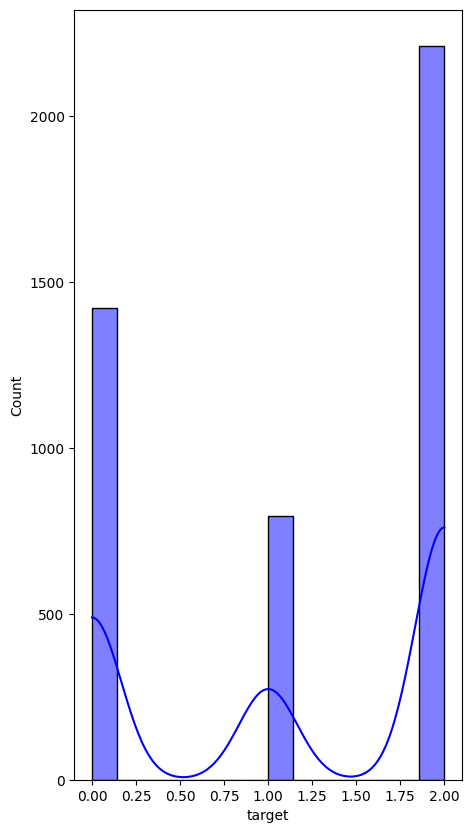

In [10]:
plt.figure(figsize=(5, 10))
sns.histplot(data['target'], color="Blue", kde=True)
plt.show()

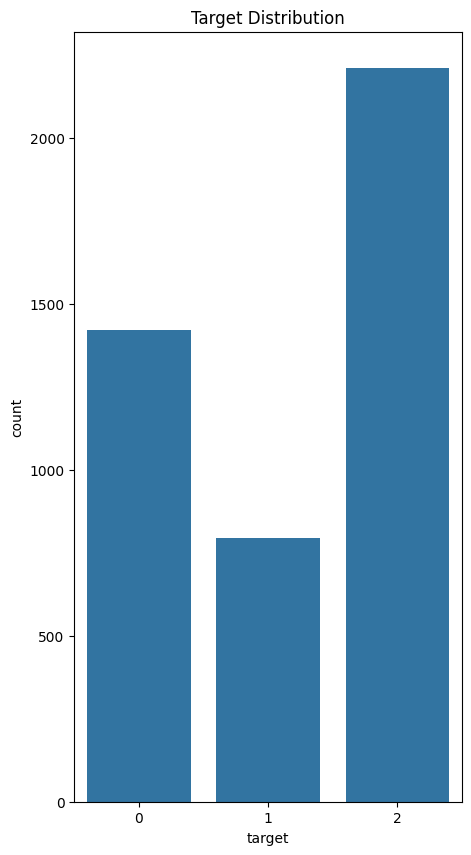

In [11]:
plt.figure(figsize=(5, 10))
sns.countplot(data = data, x="target").set_title('Target Distribution')
plt.show()

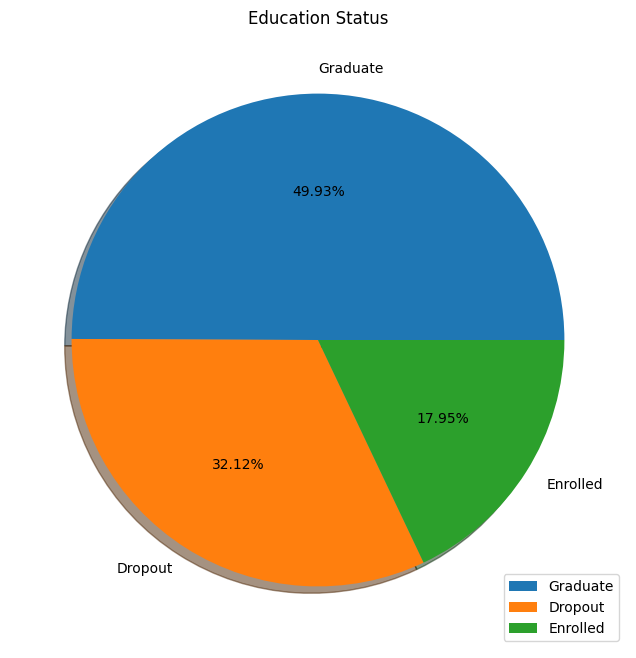

In [12]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(data['target'].value_counts(), labels = ['Graduate', 'Dropout', 'Enrolled'], explode = (0.0, 0.0, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')
plt.show()

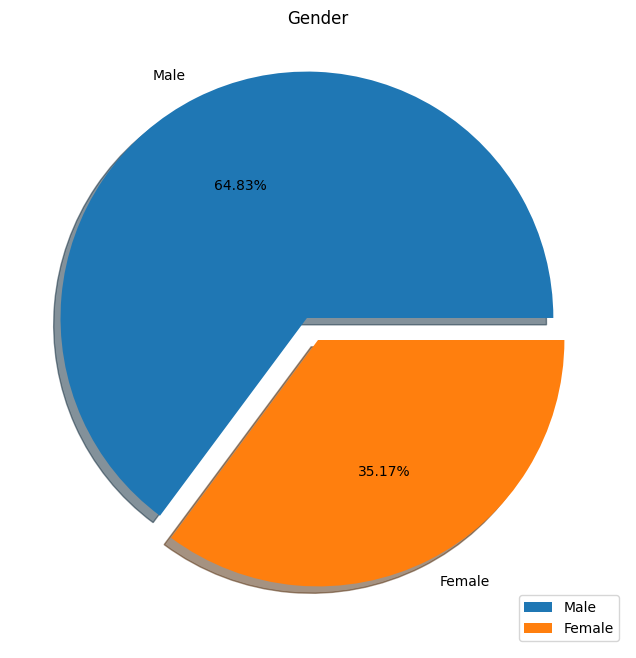

In [13]:
plt.figure(figsize=(8, 8))
plt.title("Gender")
plt.pie(data['Gender'].value_counts(), labels = ['Male', 'Female'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')
plt.show()

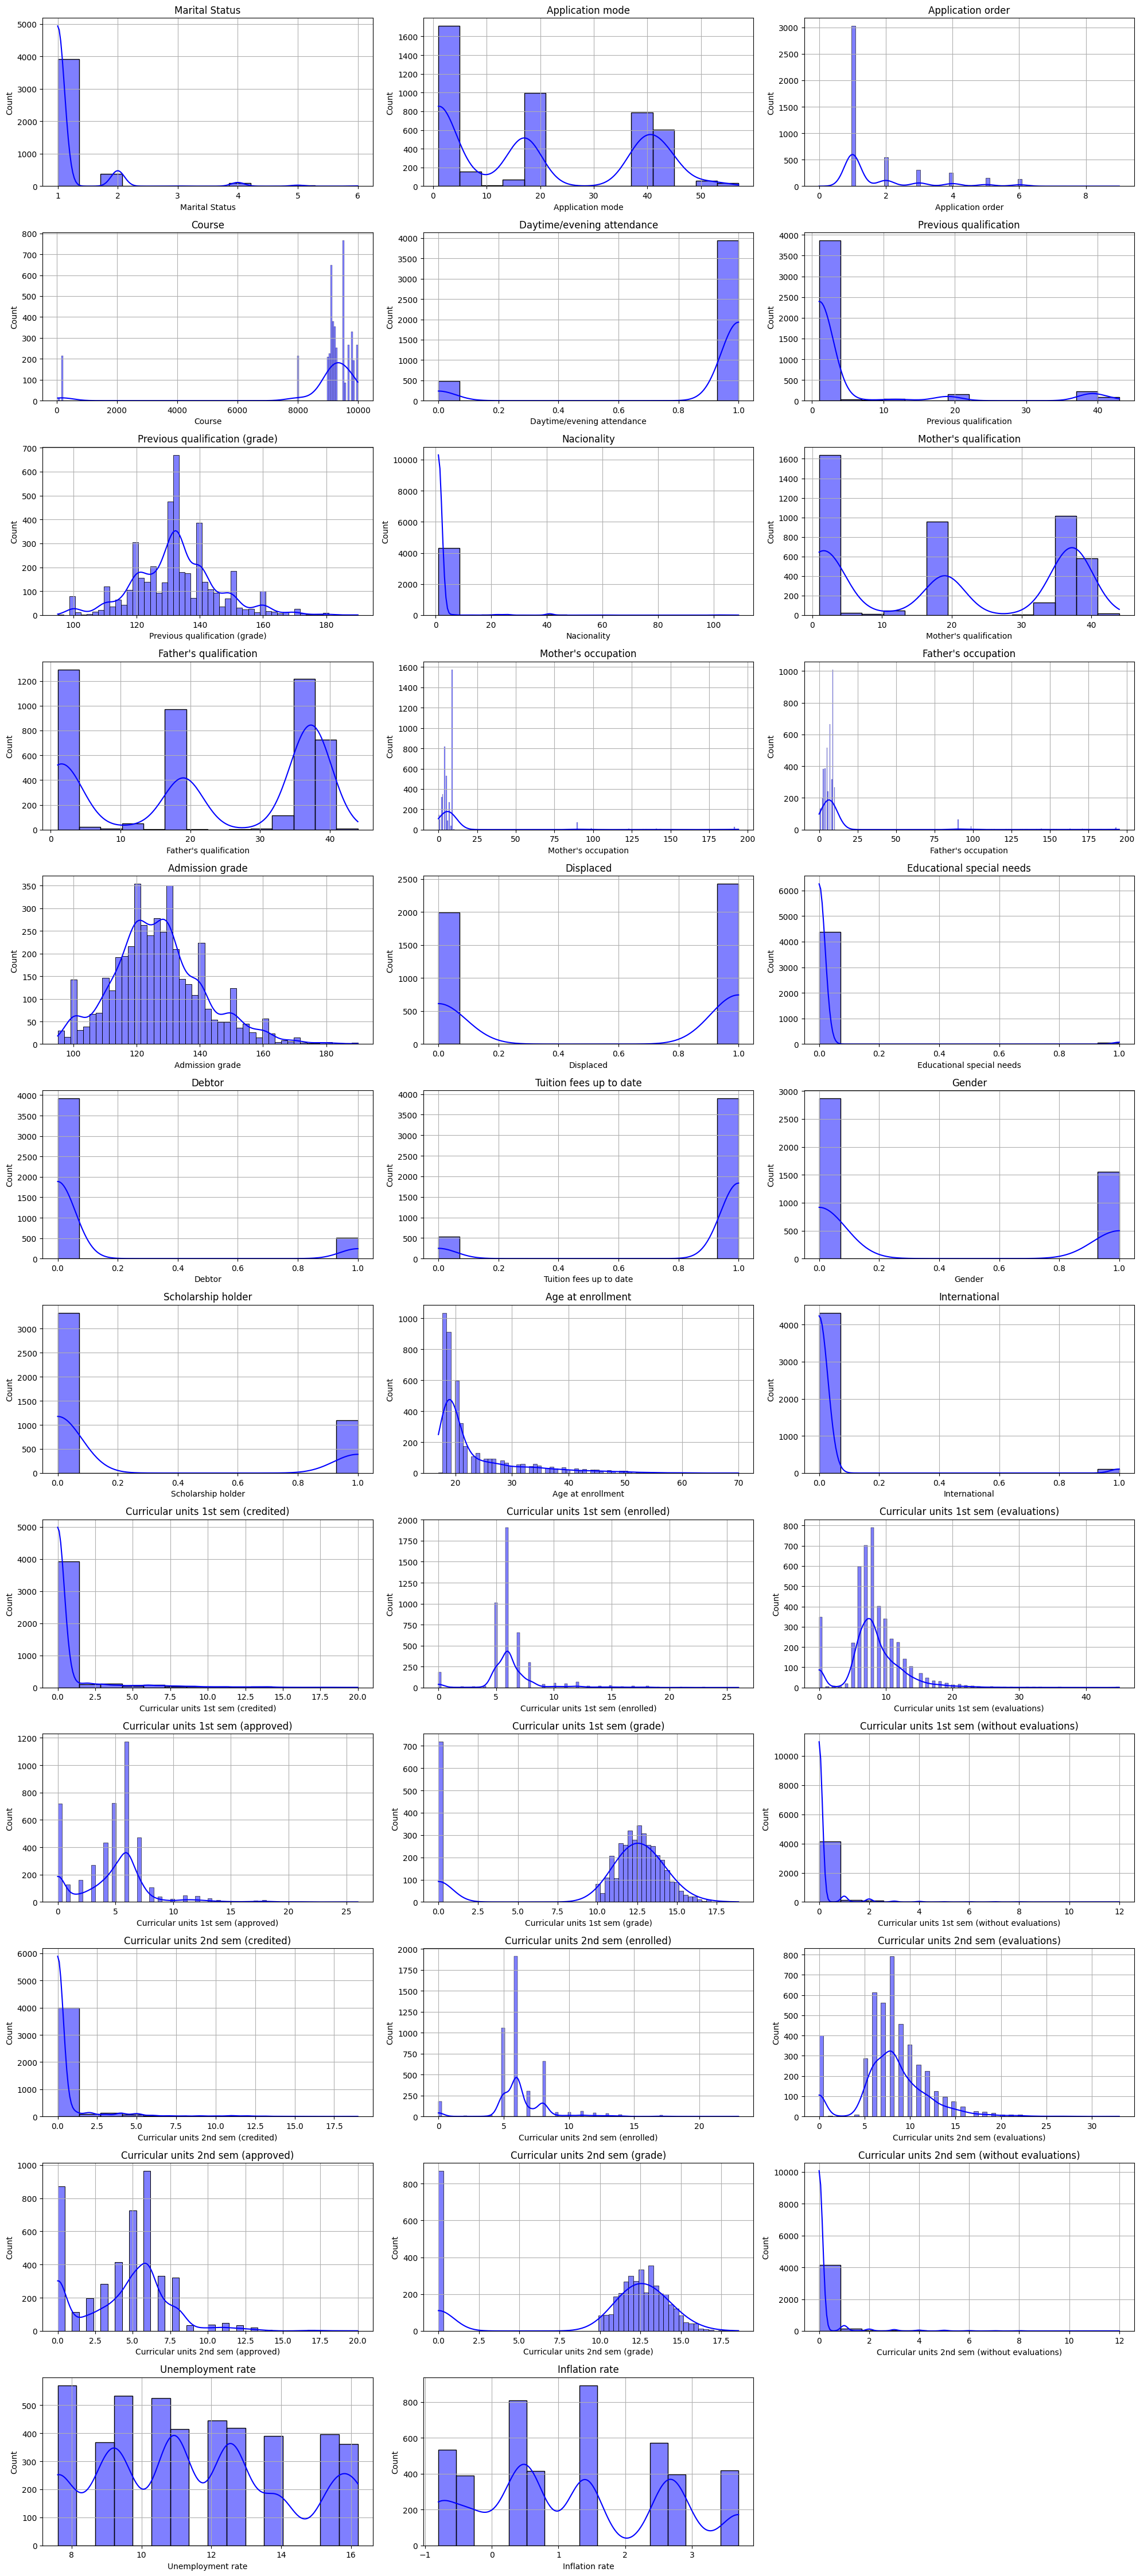

In [14]:
plt.figure(figsize=(20, 45))

for i in range(0, 35):
    plt.subplot(12, 3, i+1)
    sns.histplot(data.iloc[:, i], color='blue', kde=True)
    plt.title(data.columns[i])
    plt.grid()

plt.tight_layout()
plt.show()

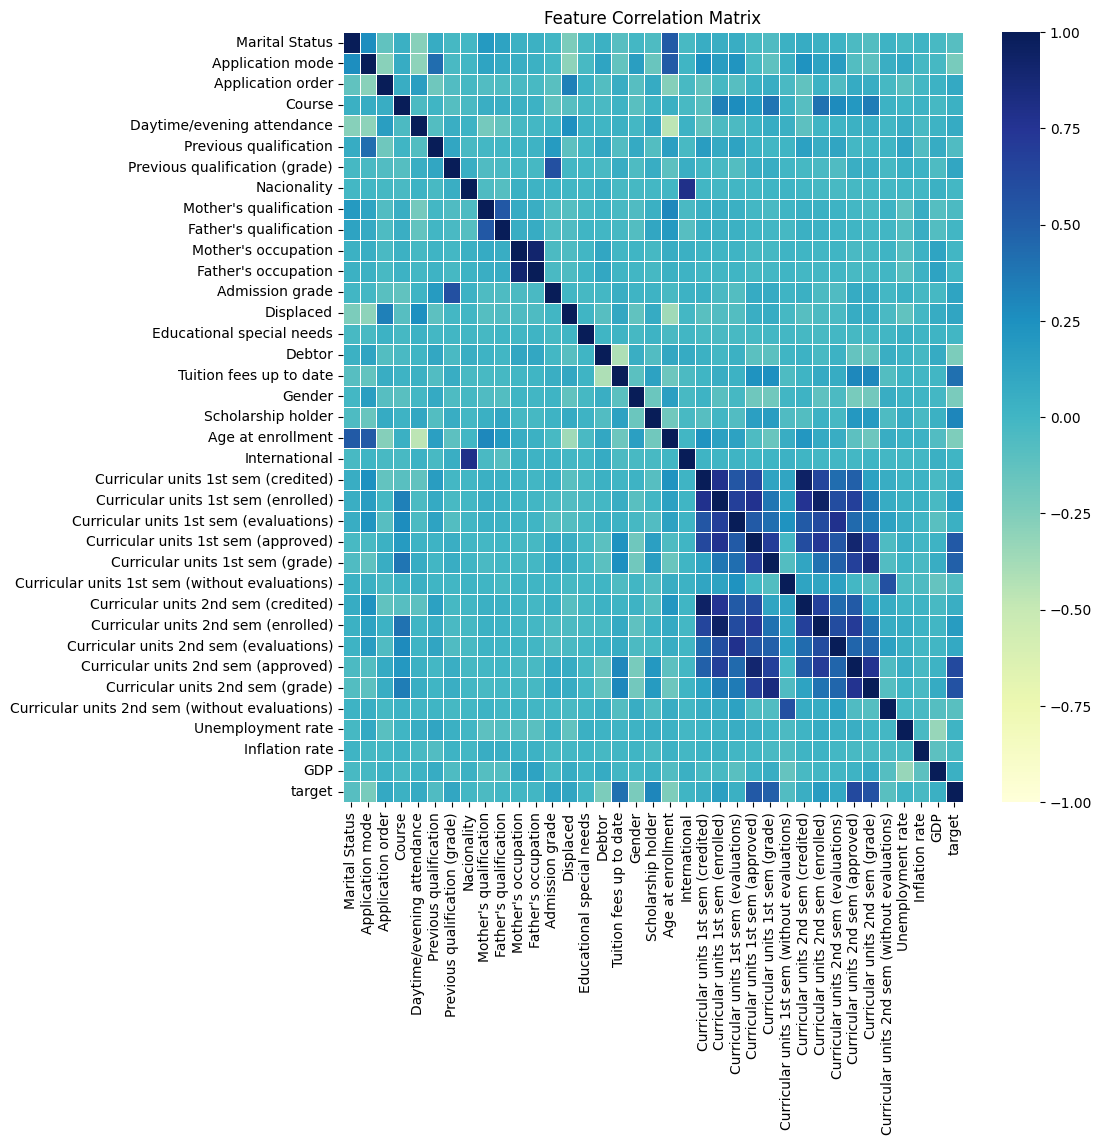

In [15]:
#feature selection
corr_matrix = data.corr(method="pearson")
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=False, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [16]:
["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]
corr_matrix["target"]

,target
Marital Status,-0.089804
Application mode,-0.221747
Application order,0.089791
Course,0.034219
Daytime/evening attendance,0.075107
Previous qualification,-0.056039
Previous qualification (grade),0.103764
Nacionality,-0.014801
Mother's qualification,-0.043178
Father's qualification,-0.001393


# **3. Data Preparation**

**3.1 Data Cleaning**

In [17]:
data.drop(data[data['target'] == 1].index, inplace = True)
data

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [18]:
data['Dropout'] = data['target'].apply(lambda x: 1 if x==0 else 0)
data

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target,Dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,2,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,0,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,0,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,2,0


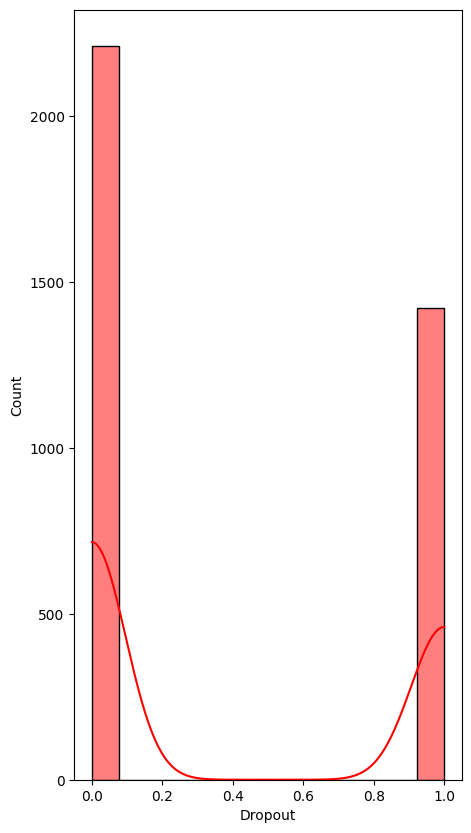

In [19]:
plt.figure(figsize=(5, 10))
sns.histplot(data['Dropout'], color="red", kde=True) # Use histplot and add kde=True for a kernel density estimate line
plt.show()

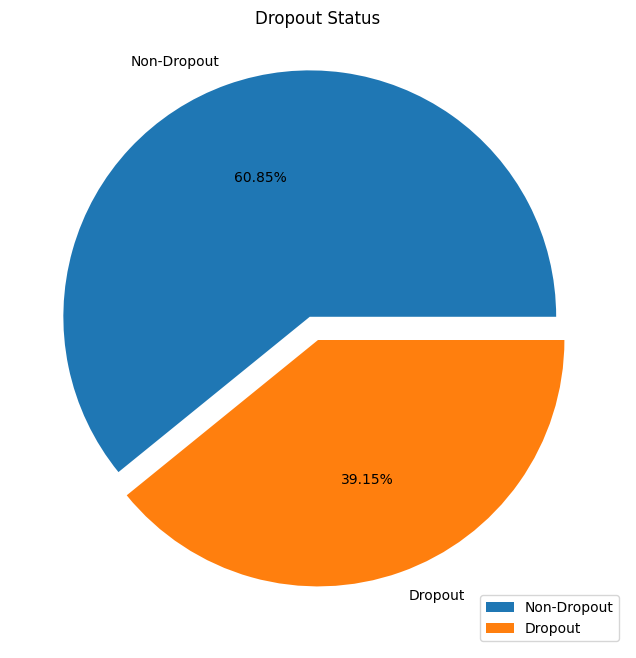

In [20]:
plt.figure(figsize=(8, 8))
plt.title("Dropout Status")
plt.pie(data['Dropout'].value_counts(),  labels = ['Non-Dropout', 'Dropout'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = False)
plt.legend( loc = 'lower right')
plt.show()

**3.2 Standarisasi**

In [21]:
x = data.iloc[:, :36].values
#x = df[["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]].values
print(x)
x = StandardScaler().fit_transform(x)
x

[[ 1.   17.    5.   ... 10.8   1.4   1.74]
 [ 1.   15.    1.   ... 13.9  -0.3   0.79]
 [ 1.    1.    5.   ... 10.8   1.4   1.74]
 ...
 [ 1.    1.    1.   ... 13.9  -0.3   0.79]
 [ 1.    1.    1.   ...  9.4  -0.8  -3.12]
 [ 1.   10.    1.   ... 12.7   3.7  -1.7 ]]


array([[-0.30068558, -0.08191671,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       [-0.30068558, -0.19714928, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       ...,
       [-0.30068558, -1.00377727, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727, -0.56247077, ..., -0.83619059,
        -1.46715379, -1.37663355],
       [-0.30068558, -0.4852307 , -0.56247077, ...,  0.4010228 ,
         1.78259971, -0.74822447]])

In [22]:
y = data['Dropout'].values
y

array([1, 0, 1, ..., 1, 0, 0])

**3.3 Split Data**

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# **4. Model Development dan Evaluation**

In [24]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

a. Gaussian Naive Bayes

In [25]:
model1_nb = GaussianNB()
model1_nb.fit(x_train, y_train)

GaussianNB()

In [26]:
y_pred_model1 = model1_nb.predict(x_test)

Precision :  0.8457300275482094
Recall :  0.8457300275482094
Accuracy :  0.8457300275482094
F1 Score :  0.8457300275482094

 [[405  43]
 [ 69 209]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       448
           1       0.83      0.75      0.79       278

    accuracy                           0.85       726
   macro avg       0.84      0.83      0.83       726
weighted avg       0.84      0.85      0.84       726

******************************************************



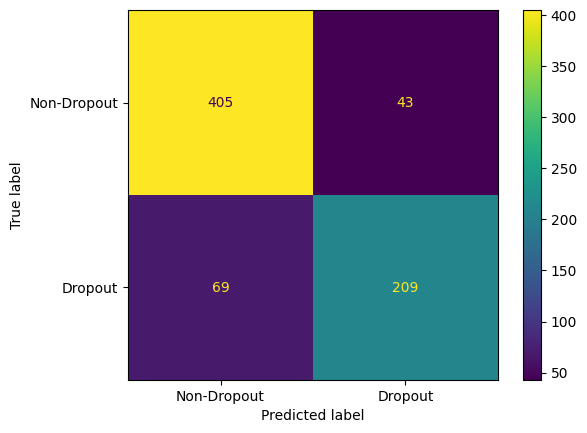

In [27]:
perform(y_pred_model1)

b. Logistic Regression

In [28]:
model2_lr = LogisticRegression()
model2_lr.fit(x_train, y_train)

LogisticRegression()

In [29]:
y_pred_model2 = model2_lr.predict(x_test)

Precision :  0.9132231404958677
Recall :  0.9132231404958677
Accuracy :  0.9132231404958677
F1 Score :  0.9132231404958677

 [[429  19]
 [ 44 234]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       448
           1       0.92      0.84      0.88       278

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726

******************************************************



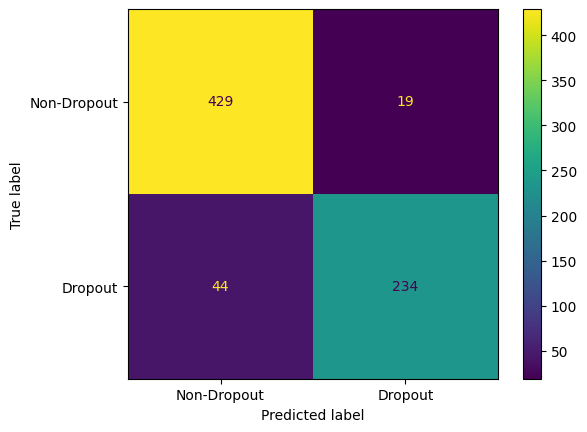

In [30]:
perform(y_pred_model2)

c. Random Forest Classifier

In [31]:
model3_rf = RandomForestClassifier(n_estimators=500,criterion='entropy')
model3_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [32]:
y_pred_model3 = model3_rf.predict(x_test)

Precision :  0.918732782369146
Recall :  0.918732782369146
Accuracy :  0.918732782369146
F1 Score :  0.918732782369146

 [[433  15]
 [ 44 234]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       448
           1       0.94      0.84      0.89       278

    accuracy                           0.92       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726

******************************************************



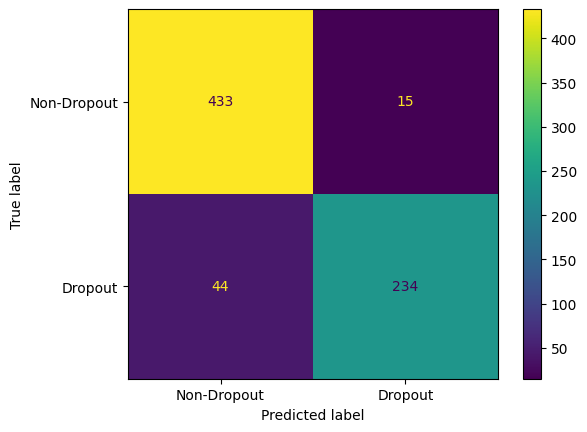

In [33]:
perform(y_pred_model3)

# **5. Comparison of Results**

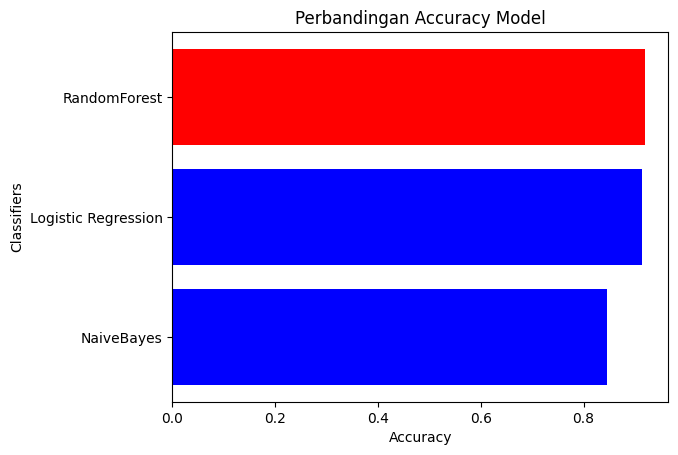

In [34]:
predict=[y_pred_model1,y_pred_model2,y_pred_model3]
acc=[]
classifiers=["NaiveBayes","Logistic Regression","RandomForest"]
for i in predict:
    temp=accuracy_score(y_test, i)
    acc.append(temp)

# Temukan indeks akurasi terbaik
best_acc_index = np.argmax(acc)

# Buat daftar warna
colors = ['blue'] * len(classifiers)
colors[best_acc_index] = 'red'
plt.barh(classifiers, acc, color=colors)

# Add labels and title
plt.ylabel('Classifiers')
plt.xlabel('Accuracy')
plt.title('Perbandingan Accuracy Model')
plt.show()